In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, ReLU, PReLU, Cropping2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from skimage.metrics import structural_similarity as ssim

In [ ]:
image_dataset = np.load("/Users/User/Documents/Inverse Design of Metamaterials/Data/images.npy")
print(image_dataset.shape)

(98171, 29, 29)


In [ ]:
alpha_dataset = np.load("/Users/User/Documents/Inverse Design of Metamaterials/Data/alpha.npy")
print(alpha_dataset.shape)

(98171,)


In [ ]:
image_train, image_temp, alpha_train, alpha_temp = train_test_split(image_dataset, alpha_dataset, test_size=0.2, random_state=42)
image_val, image_test, alpha_val, alpha_test = train_test_split(image_temp, alpha_temp, test_size=0.25, random_state=42)

In [ ]:
# Build the Neural Network Model
model = models.Sequential(name = 'Forward')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(29, 29, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))  # Assuming a 4x4 stiffness matrix
model.add(layers.Dense(16))# Output layer for stiffness matrix
model.add(layers.Dense(1))
#model.add(layers.Reshape((1, 1)))  # Reshape to get a 4x4 matrix

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Forward"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 27, 27, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,609 (478.94 KB)

 Trainable params: 122,609 (478.94 KB)

 Non-trainable params: 0 (0.00 B)

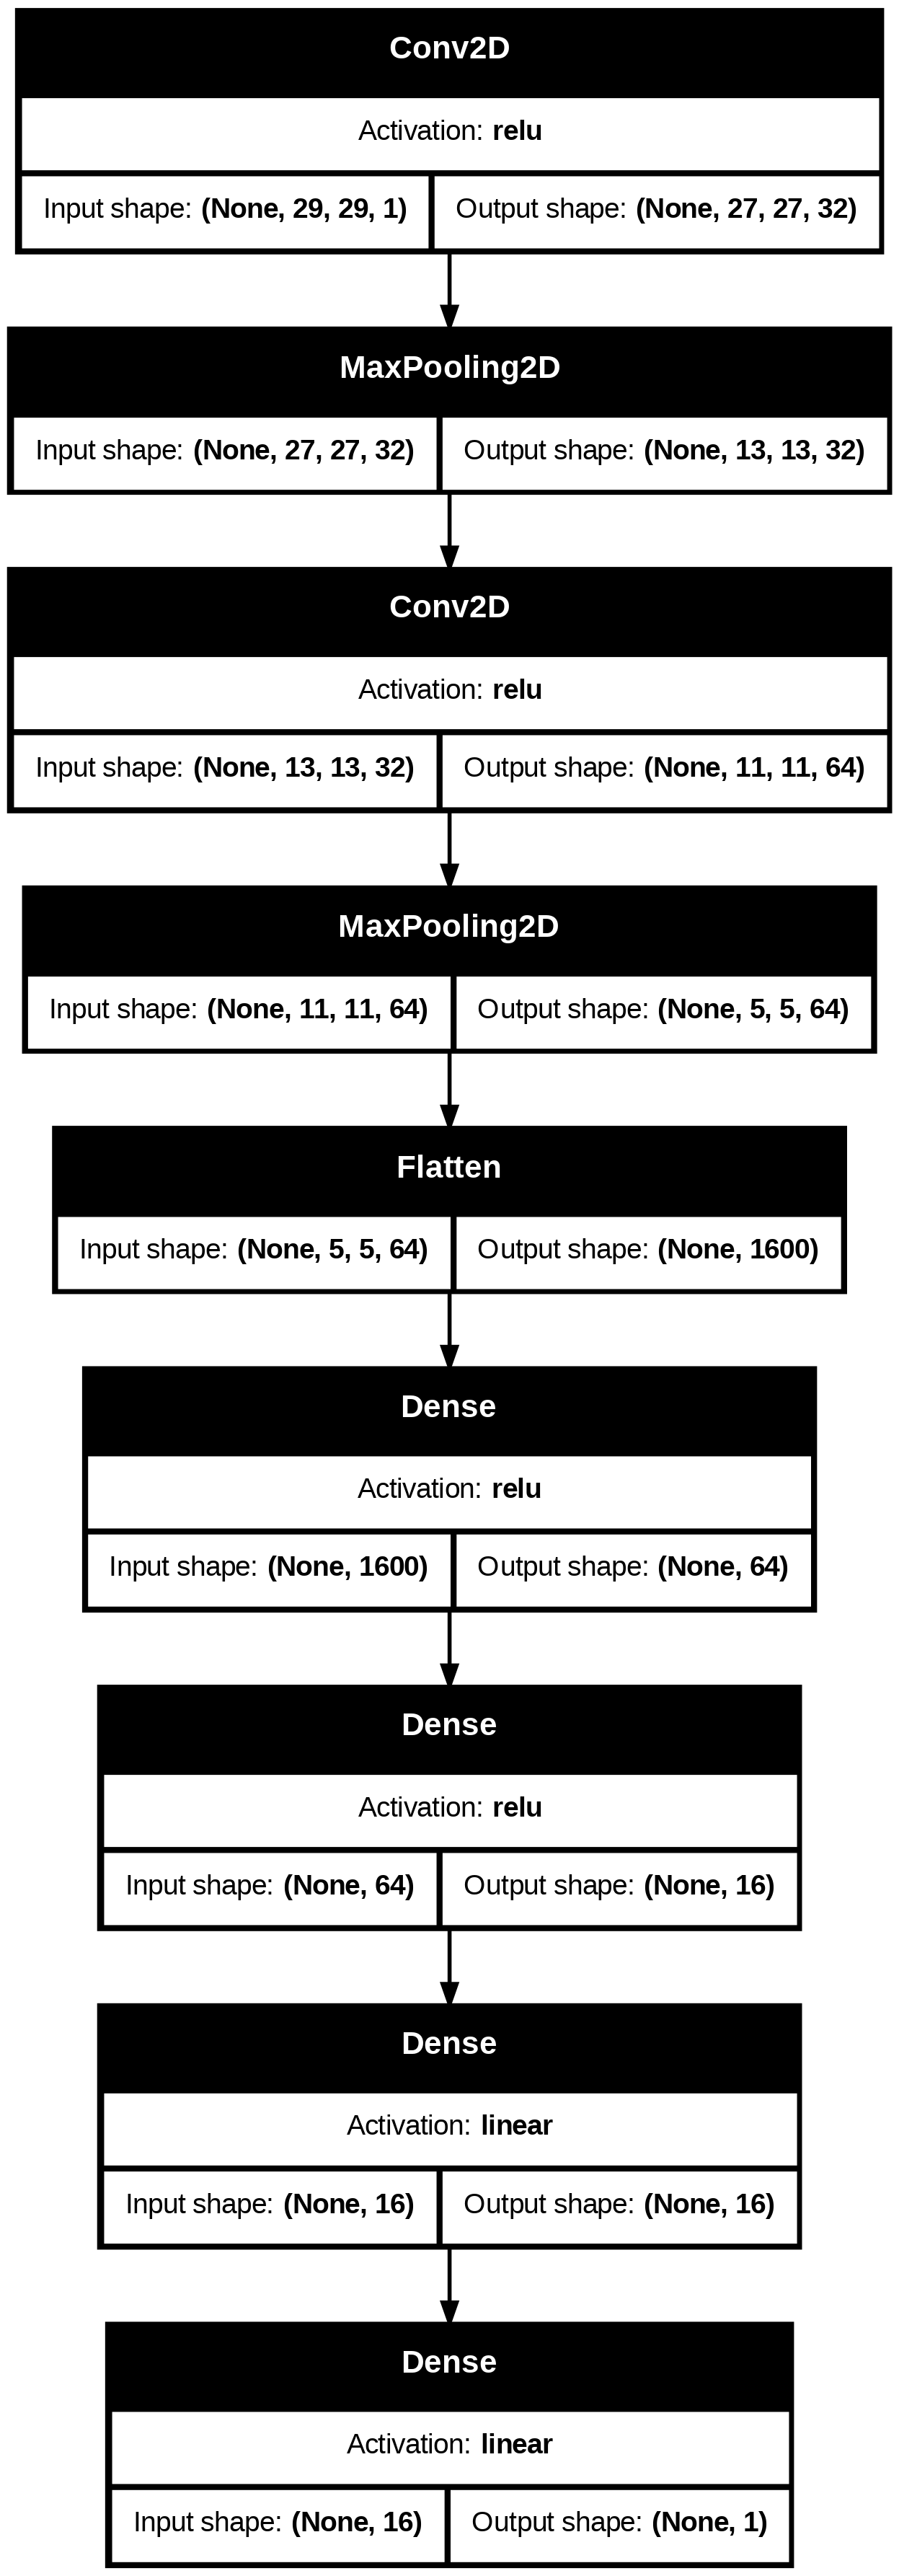

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming you have already built your models named `encoder`, `decoder`, and `vae`

# Visualize the encoder architecture
plot_model(model, to_file='/content/drive/MyDrive/alpha_predictor.png', show_shapes=True, show_layer_names=False, show_layer_activations=True)
#print("Encoder model architecture has been saved to CVAE.png")

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0280 - val_loss: 0.0012
Epoch 2/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.0963e-04 - val_loss: 0.0020
Epoch 3/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.6463e-04 - val_loss: 4.9121e-04
Epoch 4/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9396e-04 - val_loss: 2.5925e-04
Epoch 5/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.7479e-04 - val_loss: 2.6252e-04
Epoch 6/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.2827e-04 - val_loss: 2.6220e-04
Epoch 7/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.8568e-04 - val_loss: 1.7116e-04
Epoch 8/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2352e-04 - val_loss: 3.6919e-04
Epoch 9/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1961e-04 - val_loss: 1.5116e-04
Epoch 10/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9401e-04 - val_loss: 3.1633e-04
Epoch 11/20
2455/2455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/

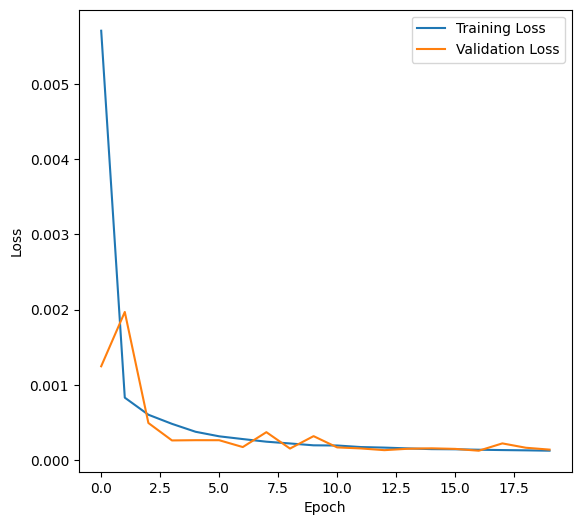

In [ ]:
history = model.fit(image_train, alpha_train, epochs=20, batch_size=32, validation_data=(image_val, alpha_val))
train_loss = history.history['loss']
validation_loss = history.history['val_loss']


plt.figure(figsize=(14, 6))

# Plot training & validation loss values for the Inverse model
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
#plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save_weights("/content/drive/MyDrive/alpha_prediction_weights.h5")

In [ ]:
model.load_weights("/content/drive/MyDrive/alpha_prediction_weights.h5")

In [ ]:
selected_indices = np.random.choice(image_test.shape[0], size=4000, replace=False)

# Select the corresponding 10 elements
selected_elements = image_test[selected_indices]


In [ ]:
import time

start_time = time.time()

test = model.predict(selected_elements)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Execution time: 0.2798008918762207 seconds


In [ ]:
import muSpectre
from muFFT import Stencils2D

def index_to_voigt(C):
    n = np.zeros((4,4))
    n = C
    C_voigt =  np.zeros((3,3))
    C_voigt[0,0] = n[0, 0]
    C_voigt[0,1] = n[0, 3]
    C_voigt[1,0] = n[3, 0]
    C_voigt[1,1] = n[3, 3]
    C_voigt[2,2] = n[2, 2]
    return C_voigt

def calculate_alpha(element):
  #print(element.shape)
  #l = len(element)
  #stiffness = np.zeros((l,4,4))
  #for n in range(l):
  #print(l)
  #print(element.shape)
  #C_xx = np.zeros((l, 1))
  #alpha = np.zeros((l, 1, 2))
  nb_grid_pts = element.shape[0], element.shape[1]
  domain_lens = [1, 1]#[float(r) for r in nb_grid_pts]
  gradient = Stencils2D.linear_finite_elements
  weights = [1,1]
  cell = muSpectre.cell.CellData.make(nb_grid_pts, domain_lens)
  cell.nb_quad_pts = 2
  Mat = muSpectre.material.MaterialLinearElastic1_2d
  young_soft = 0
  young_hard = 1
  poisson = .33
  soft = Mat.make(cell,"soft", young_soft, poisson)
  hard = Mat.make(cell,"hard", young_hard, poisson)
  counter = 0
  for i, pixel in cell.pixels.enumerate():
  #print(element[tuple(pixel)])
      counter = counter + 1
      if element[tuple(pixel)] == 1:
          soft.add_pixel(i)
      else:
          hard.add_pixel(i)
  cg_tol = 2e-8
  equi_tol = 0.001
  maxiter = 500  # for linear cell solver
  verbose_krylov = muSpectre.Verbosity.Silent

  krylov_solver = muSpectre.solvers.KrylovSolverCG(cg_tol, maxiter, verbose_krylov)
  newton_tol = 2e-8

  verbose_newton= muSpectre.Verbosity.Full
  control = muSpectre.solvers.MeanControl.strain_control
  newton_solver = muSpectre.solvers.SolverNewtonCG(cell,
                                              krylov_solver,
                                              verbose_newton,
                                              newton_tol,
                                              equi_tol,
                                              maxiter,
                                              gradient,
                                              weights,
                                              control)

  newton_solver.formulation = muSpectre.Formulation.small_strain

  newton_solver.initialise_cell()
  newton_solver.evaluate_stress_tangent()
  C_eff = newton_solver.compute_effective_stiffness()
  #stiffness = C_eff
  C_voigt = index_to_voigt(C_eff)
  #stiffness_voigt[n] = C_voigt
  alpha = C_voigt[0,0]/C_voigt[1,1]


  return alpha

In [ ]:
import time

start_time = time.time()


l = 3500
print(l)
#train_stiffness = np.zeros((l,4,4))
alpha = np.zeros((l))
#C_yy_test = np.zeros((l))
#val_stiffness = np.zeros((l,4,4))
for n in range(l):
  print(n)
  #val_stiffness[n] = calculate_stiffness(val_images[n].reshape(29,29))
  #train_stiffness[n] = calculate_stiffness(X_train[n].reshape(29,29))
  a = calculate_alpha(selected_elements[n].reshape(29,29))
  alpha[n] = a
alpha_test_mu = alpha
#val_stiff_mu = val_stiffness
#train_stiff_mu = train_stiffness
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

3500
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

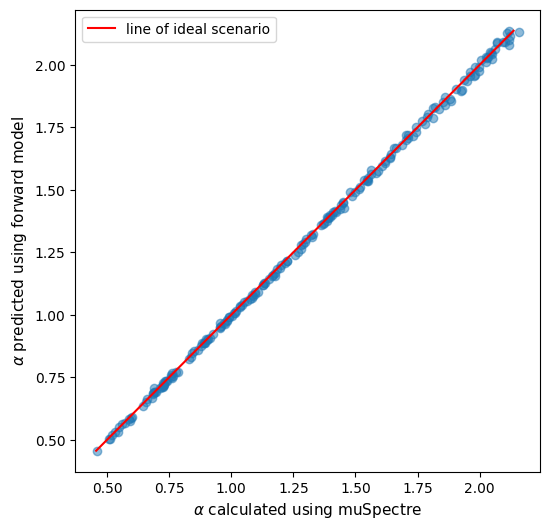

In [ ]:
plt.figure(figsize=(6, 6))
#plt.scatter(predict_00, predict_00, c='red', label='Predictions (0,0)')
#plt.scatter(train, train_predict, c='blue', label='Train Stiffness (0,1)')
#plt.scatter(test, test_predict, c='red', label='Validation Stiffness (0,1)')
plt.scatter(alpha_test_mu, test, alpha = 0.5)
x_line = np.linspace(min(test), max(test), 100)
plt.plot(x_line, x_line, color='red', label='line of ideal scenario')
#plt.scatter(predict_01, predict_01, c='red', label='Predictions (0,1)')
#plt.title('MuSpectre data vs. Model Predictions Scatter Plot')
plt.xlabel(r"$\alpha$ calculated using muSpectre", fontsize=11)
plt.ylabel(r"$\alpha$ predicted using forward model", fontsize=11)
plt.legend()
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score
print("R2 score for Validation data",r2_score(alpha_test_mu, test))

R2 score for Validation data 0.9995450057671276
